In [1]:
#dependent var: GDP 
#independent var:Capital productivity index & Foreign direct investment

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
GDP = pd.read_csv("/Users/yutoyama12/Desktop/Data/GDP US.csv")
FDI = pd.read_csv("/Users/yutoyama12/Desktop/Data/FDI US.csv")
CP = pd.read_csv("/Users/yutoyama12/Desktop/Data/Capital Productivity.csv")


# Sationary Test

In [3]:
CP

,Date,Capital Productivity,diff
0,1985,148.658607,NaN
1,1986,146.476330,-2.182277
2,1987,144.778892,-1.697438
3,1988,144.428267,-0.350625
4,1989,143.294170,-1.134097
5,1990,140.277721,-3.016449
6,1991,135.588618,-4.689103
7,1992,136.066651,0.478033
8,1993,135.441523,-0.625128
9,1994,136.302360,0.860837


Text(0.5, 1.0, 'GDP per capita')

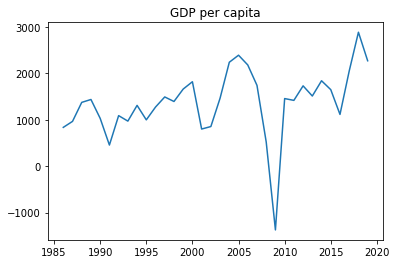

In [4]:
y= GDP.iloc[:,2]
x=GDP.iloc[:,0]
l1= plt.plot(x,y)
plt.title ('GDP per capita')

In [5]:
# ADF test

result1 = adfuller(GDP['diff'][1:],maxlag=1)

result1[0]

-3.4107674497793994

In [6]:
result1[4]

{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

Text(0.5, 1.0, 'Foreign Direct Investment')

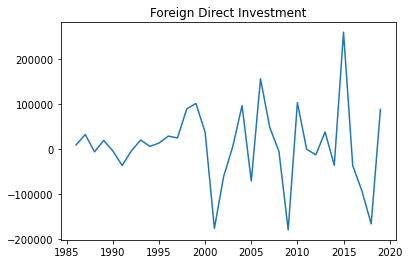

In [7]:
y=FDI.iloc[:,2]
x=FDI.iloc[:,0]
l1= plt.plot(x,y)
plt.title ('Foreign Direct Investment')

In [8]:
#ADF test

result1 = adfuller(FDI['diff'][1:],maxlag=1)

result1[0]

-6.087606795305174

In [9]:
result1[4]

{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

Text(0.5, 1.0, 'Capital Productivity ')

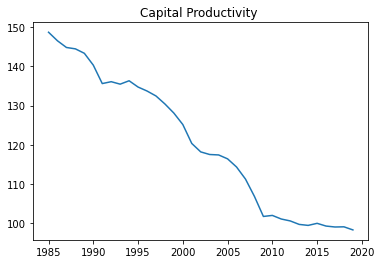

In [10]:
y= CP.iloc[:,1]
x= CP.iloc[:,0]
l1= plt.plot(x,y)
plt.title ('Capital Productivity ')

In [11]:
#ADF test

result1 = adfuller(CP['diff'][1:],maxlag=1)

result1[0]

-3.671560954961665

In [12]:
result1[4]

{'1%': -3.6461350877925254,
 '5%': -2.954126991123355,
 '10%': -2.6159676124885216}

# SVAR

In [13]:
x= pd.concat([GDP['Date'],GDP['diff'],FDI['diff'],CP['diff']],axis=1)
x=x.iloc[1:,:]
x = x.set_index('Date',drop=True,append=False)

In [14]:
x=np.asarray(x)
#x

X=[GDP_t FDI_t CP_t GDP_t-1 FDI_t-1 CP_t-1 GDP_t-2 FDI_t-2,CP_t-2,1]

In [15]:
M=np.hstack((x[2:,:],x[1:-1,:],x[0:-2,:]))

In [16]:
#matrix A,B
A=np.zeros((6,6))
A[3,0]=1
A[4,1]=1
A[5,2]=1
print(A)
B=np.identity(6)
B

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [17]:
#GDP_t regression
M1=np.hstack((M[:,1:],np.ones((M.shape[0],1))))
Y=M[:,0]
X=M1


from statsmodels import api as sm
model=sm.OLS(Y,X).fit()
print(model.summary())

B[0,1]= 0.0007 
B[0,2]= 327.2318  
A[0,:]= [0.7715,-0.0005,-146.2480,-0.2616,0.0008 , 65.6010 ]
A
#x1,x2,x3* 
#report x1-x5

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5.724
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           0.000458
Time:                        10:55:45   Log-Likelihood:                -238.95
No. Observations:                  32   AIC:                             495.9
Df Residuals:                      23   BIC:                             509.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.001      0.669      0.5

array([[ 7.71500e-01, -5.00000e-04, -1.46248e+02, -2.61600e-01,
         8.00000e-04,  6.56010e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  1.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])

In [18]:
#FDI regression
M2=np.hstack((M[:,3:],np.ones((M.shape[0],1))))
Y=M[:,1]
X=M2

from statsmodels import api as sm
model=sm.OLS(Y,X).fit()
print(model.summary())

A[1,:]=[-17.6077,-0.1772 ,1.85e+04,25.1601,-0.2034,-386.2901]
A

#report x1,x2,x3

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.125
Method:                 Least Squares   F-statistic:                    0.4273
Date:                Sat, 13 Nov 2021   Prob (F-statistic):              0.854
Time:                        10:55:45   Log-Likelihood:                -408.72
No. Observations:                  32   AIC:                             831.4
Df Residuals:                      25   BIC:                             841.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -17.6077     39.883     -0.441      0.6

array([[ 7.715000e-01, -5.000000e-04, -1.462480e+02, -2.616000e-01,
         8.000000e-04,  6.560100e+01],
       [-1.760770e+01, -1.772000e-01,  1.850000e+04,  2.516010e+01,
        -2.034000e-01, -3.862901e+02],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00]])

In [19]:
#CP regression
M3=np.hstack((M[:,3:],np.ones((M.shape[0],1))))
Y=M[:,2]
X=M3

from statsmodels import api as sm
model=sm.OLS(Y,X).fit()
print(model.summary())

A[2,:]=[-0.0012,-5.713e-06,0.6342,-0.0002,-4.826e-06,0.2921]
A

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     4.504
Date:                Sat, 13 Nov 2021   Prob (F-statistic):            0.00318
Time:                        10:55:46   Log-Likelihood:                -48.662
No. Observations:                  32   AIC:                             111.3
Df Residuals:                      25   BIC:                             121.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0012      0.001     -2.277      0.0

array([[ 7.715000e-01, -5.000000e-04, -1.462480e+02, -2.616000e-01,
         8.000000e-04,  6.560100e+01],
       [-1.760770e+01, -1.772000e-01,  1.850000e+04,  2.516010e+01,
        -2.034000e-01, -3.862901e+02],
       [-1.200000e-03, -5.713000e-06,  6.342000e-01, -2.000000e-04,
        -4.826000e-06,  2.921000e-01],
       [ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00]])

# Impulse Reaction Function

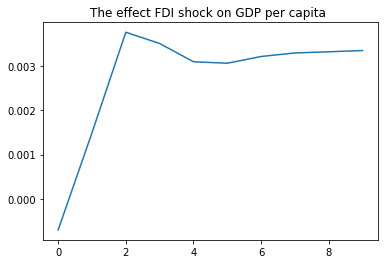

In [20]:
#impulse reaction function:shock of FDI at time t effect on future GDP per capita
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

#contemporaneous effect of FDI shock at time t on GDP on time t
Imp[0]=invB[0,1]
 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[0,1]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.title('The effect FDI shock on GDP per capita ')
plt.show()



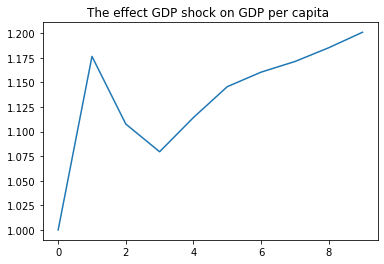

In [21]:
#impulse reaction function:shock of GDP at time t effect on future GDP per capita
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[0,0]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[0,0]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.title('The effect GDP shock on GDP per capita ')
plt.show()


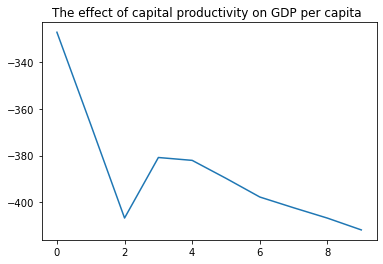

In [22]:
#impulse reaction function:shock of labor productivity at time t effect on future GDP per capita
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[0,2]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[0,2]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.title('The effect of capital productivity on GDP per capita ')
plt.show()


#consistant with hypothesis

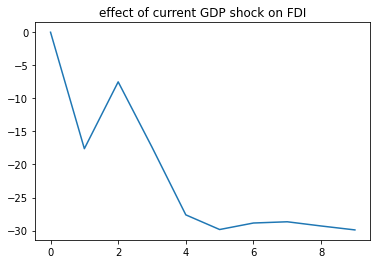

In [23]:
#impulse reaction function:shock of GDP per capita at time t effect on FDI
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[1,0]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[1,0]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.title('effect of current GDP shock on FDI')
plt.show()

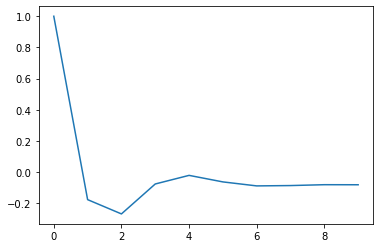

In [24]:
#impulse reaction function:shock of FDI at time t effect on FDI
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[1,1]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[1,1]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.show()

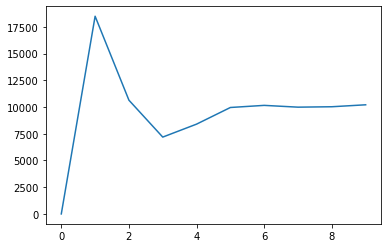

In [25]:
#impulse reaction function:shock of CP per capita at time t effect on FDI
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[1,2]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[1,2]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.show()

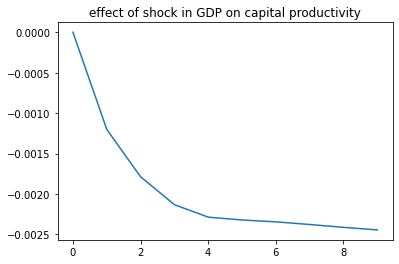

In [26]:
#impulse reaction function:shock of GDP per capita at time t effect on CP
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[2,0]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[2,0]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.title('effect of shock in GDP on capital productivity')
plt.show()

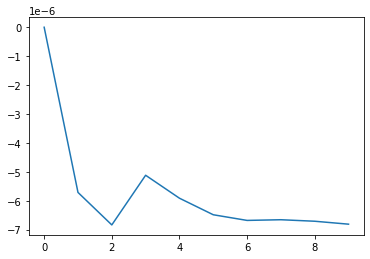

In [27]:
#impulse reaction function:shock of FDI at time t effect on CP
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[2,1]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[2,1]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.show()

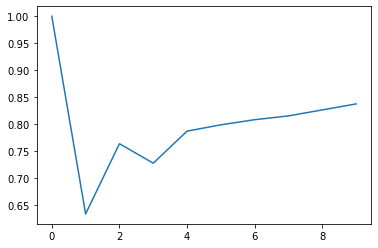

In [28]:
#impulse reaction function:shock of CP at time t effect on CP
Imp=np.zeros((10,1))
invB = np.linalg.inv(B)
D=A.copy()

Imp[0]=invB[2,2]
#range(1,10) 
for i in range(1,10):
    F=np.dot(invB,D)
    Imp[i]=F[2,2]
    D=np.dot(A,D)
    
import matplotlib.pyplot as plt
plt.plot(np.arange(0,10), Imp)
plt.show()